### Data Science Immersive Admissions Task

**Part 1: Foundational Data Analysis**

Kickstarter, the crowdfunding platform, is thinking about providing a consulting service to project founders to help its customers create more successful crowdfunding campaigns. You’ve been asked to do some initial analysis. 

In order to complete this assignment, please follow the link and download the following Kickstarter dataset: http://bit.ly/2cgMGDm. Use the dataset to complete this task.

We are tools agnostics, you can use any tools you’d like: Excel, Python, SQL, Tableau, Google spreadsheets, etc. We recommend using whatever tool you know best, we're here to find out how you think about solving data problems, not which tool you can do it in.

**Part 2: Qualitative analysis**

Create a presentation using Google Slides (max. 5 slides) using the data above (and additional data from those tables) that make clear recommendations on how people can create a successful Kickstarter campaign.

Be sure to consider the following:

- What's the best length of time to run a campaign?
- What's the ideal pledge goal?
- What type of projects would be most successful at getting funded?
- Is there an ideal month/day/time to launch a campaign

### Data cleaning

In [1]:
#Load libraries, set seaborn format for plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse 
sns.set()

In [2]:
#Load data into dataframe
df = pd.read_excel("DSI_kickstarterscrape_dataset.xlsx")
print(df.shape)
df.head()

(45957, 17)


project id                                               name  \
0       39409                              WHILE THE TREES SLEEP   
1      126581               Educational Online Trading Card Game   
2      138119                                              STRUM   
3      237090  GETTING OVER - One son's search to finally kno...   
4      246101  The Launch of FlyeGrlRoyalty &quot;The New Nam...   

                                                 url      category  \
0  http://www.kickstarter.com/projects/emiliesaba...  Film & Video   
1  http://www.kickstarter.com/projects/972789543/...         Games   
2  http://www.kickstarter.com/projects/185476022/...  Film & Video   
3  http://www.kickstarter.com/projects/charnick/g...  Film & Video   
4  http://www.kickstarter.com/projects/flyegrlroy...       Fashion   

          subcategory         location      status     goal  pledged  \
0          Short Film     Columbia, MO  successful  10500.0  11545.0   
1  Board & Card Games    Maplewood, NJ      failed   4000.0     20.0   
2           Animation  Los Angeles, CA        live  20000.0     56.0   
3         Documentary  Los Angeles, CA  successful   6000.0   6535.0   
4             Fashion         Novi, MI      failed   3500.0      0.0   

   funded percentage  backers                      funded date  levels  \
0           1.099524       66  Fri, 19 Aug 2011 19:28:17 -0000       7   
1           0.005000        2  Mon, 02 Aug 2010 03:59:00 -0000       5   
2           0.002800        3  Fri, 08 Jun 2012 00:00:31 -0000      10   
3           1.089167      100  Sun, 08 Apr 2012 02:14:00 -0000      13   
4           0.000000        0  Wed, 01 Jun 2011 15:25:39 -0000       6   

                                       reward levels  updates  comments  \
0               $25,$50,$100,$250,$500,$1,000,$2,500       10         2   
1                                  $1,$5,$10,$25,$50        6         0   
2  $1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001        1         0   
3  $1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...        4         0   
4                         $10,$25,$50,$100,$150,$250        2         0   

   duration  
0     30.00  
1     47.18  
2     28.00  
3     32.22  
4     30.00

In [3]:
#Check for duplicates
sum(df.duplicated())

89

In [4]:
#Drop duplicates
df=df.drop_duplicates()
df=df.reset_index(drop=True)
print(df.shape)
df.head()

(45868, 17)


project id                                               name  \
0       39409                              WHILE THE TREES SLEEP   
1      126581               Educational Online Trading Card Game   
2      138119                                              STRUM   
3      237090  GETTING OVER - One son's search to finally kno...   
4      246101  The Launch of FlyeGrlRoyalty &quot;The New Nam...   

                                                 url      category  \
0  http://www.kickstarter.com/projects/emiliesaba...  Film & Video   
1  http://www.kickstarter.com/projects/972789543/...         Games   
2  http://www.kickstarter.com/projects/185476022/...  Film & Video   
3  http://www.kickstarter.com/projects/charnick/g...  Film & Video   
4  http://www.kickstarter.com/projects/flyegrlroy...       Fashion   

          subcategory         location      status     goal  pledged  \
0          Short Film     Columbia, MO  successful  10500.0  11545.0   
1  Board & Card Games    Maplewood, NJ      failed   4000.0     20.0   
2           Animation  Los Angeles, CA        live  20000.0     56.0   
3         Documentary  Los Angeles, CA  successful   6000.0   6535.0   
4             Fashion         Novi, MI      failed   3500.0      0.0   

   funded percentage  backers                      funded date  levels  \
0           1.099524       66  Fri, 19 Aug 2011 19:28:17 -0000       7   
1           0.005000        2  Mon, 02 Aug 2010 03:59:00 -0000       5   
2           0.002800        3  Fri, 08 Jun 2012 00:00:31 -0000      10   
3           1.089167      100  Sun, 08 Apr 2012 02:14:00 -0000      13   
4           0.000000        0  Wed, 01 Jun 2011 15:25:39 -0000       6   

                                       reward levels  updates  comments  \
0               $25,$50,$100,$250,$500,$1,000,$2,500       10         2   
1                                  $1,$5,$10,$25,$50        6         0   
2  $1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001        1         0   
3  $1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...        4         0   
4                         $10,$25,$50,$100,$150,$250        2         0   

   duration  
0     30.00  
1     47.18  
2     28.00  
3     32.22  
4     30.00

In [5]:
#Inspect dataframe for data type and all features containing at least one null value
for i in range(len(df.columns)):
    if sum(pd.isnull(df[df.columns[i]]))>0:
        print([df.columns[i], df[df.columns[i]].dtypes, sum(pd.isnull(df[df.columns[i]]))])

['name', dtype('O'), 5]
['location', dtype('O'), 1321]
['pledged', dtype('float64'), 12]
['reward levels', dtype('O'), 59]


In [6]:
#Replace null values with broadly appropriate plugs
df.loc[:, "pledged"] = df.loc[:, "pledged"].fillna(df.pledged.median())
df.loc[:, "location"] = df.loc[:, "location"].fillna("Unknown")
df.loc[:, "name"] = df.loc[:, "name"].fillna("NOT SPECIFIED")
df.loc[:, "reward levels"] = df.loc[:, "reward levels"].fillna("Unknown")

In [7]:
#Confirm null values have been removed
for i in range(len(df.columns)):
    if sum(pd.isnull(df[df.columns[i]]))>0:
        print([df.columns[i], df[df.columns[i]].dtypes, sum(pd.isnull(df[df.columns[i]]))])

In [8]:
#Inspect category for typos & duplication
set(df["category"])

{'Art',
 'Comics',
 'Dance',
 'Design',
 'Fashion',
 'Film & Video',
 'Film &amp; Video',
 'Food',
 'Games',
 'Music',
 'Photography',
 'Publishing',
 'Technology',
 'Theater'}

**Film & Video** is duplicated as **Film &amp; Video**

In [9]:
#Inspect category for typos & duplication
set(df["subcategory"])

{'Animation',
 'Art',
 'Art Book',
 'Board & Card Games',
 'Board &amp; Card Games',
 "Children's Book",
 'Classical Music',
 'Comics',
 'Conceptual Art',
 'Country & Folk',
 'Country &amp; Folk',
 'Crafts',
 'Dance',
 'Design',
 'Digital Art',
 'Documentary',
 'Electronic Music',
 'Fashion',
 'Fiction',
 'Film &amp; Video',
 'Food',
 'Games',
 'Graphic Design',
 'Hip-Hop',
 'Illustration',
 'Indie Rock',
 'Jazz',
 'Journalism',
 'Mixed Media',
 'Music',
 'Narrative Film',
 'Nonfiction',
 'Open Hardware',
 'Open Software',
 'Painting',
 'Performance Art',
 'Periodical',
 'Photography',
 'Poetry',
 'Pop',
 'Product Design',
 'Public Art',
 'Publishing',
 'Rock',
 'Sculpture',
 'Short Film',
 'Technology',
 'Theater',
 'Video Games',
 'Webseries',
 'World Music'}

In addition to **Film & Video**, **Country & Folk** and **Board & Card Games** are duplicated

In [10]:
#Replace duplicated category and sub-category names
df=df.replace(["Film &amp; Video", "Country &amp; Folk","Board &amp; Card Games"], 
              ["Film & Video", "Country & Folk","Board & Card Games"])

Convert **funded date** to date-time format

In [11]:
df.loc[:, "funded date"] = df.loc[:, "funded date"].apply(parse)

In [12]:
df["funded month"]=df["funded date"].dt.month
df["funded dow"]=df["funded date"].dt.dayofweek
df["funded hour"]=df["funded date"].dt.hour

Add **numerical success/fail feature**

In [13]:
s_f=[]
for i in range(len(df["status"])):
    if df["status"][i]=="successful":
        s_f.append(1)
    else:
        s_f.append(0)

In [14]:
df["success_fail"]=s_f

Simplify **location** by classifying as either a US state or "Outside US"

In [15]:
state=df["location"].str.slice(start=-2)

In [16]:
state_2=[]
for i in state:
    if i.isupper()==1:
        state_2.append(i)
    else:
        state_2.append("Outside US")

In [17]:
list(set(state_2))

['AR',
 'AZ',
 'OH',
 'NH',
 'CA',
 'WA',
 'AK',
 'MO',
 'GA',
 'IL',
 'MA',
 'Outside US',
 'CO',
 'TN',
 'MI',
 'UT',
 'ID',
 'VT',
 'S.',
 'OR',
 'CT',
 'WI',
 'ME',
 'RI',
 'NJ',
 'AL',
 'IA',
 'ND',
 'PA',
 'HI',
 'MD',
 'WY',
 'DC',
 'MT',
 'OK',
 'NY',
 'NM',
 'MN',
 'TX',
 'VA',
 'KY',
 'SD',
 'MS',
 'SC',
 'NE',
 'DE',
 'FL',
 'WV',
 'NV',
 'NC',
 'LA',
 'KS',
 'IN']

In [18]:
#Check which location is giving "S." as a result
df[df["location"].str.slice(start=-2)=="S."]

project id                                       name  \
1775     82500894  AIRPORT MURAL - a Caribbean Collaboration   
31344  1475984188                              Under St John   

                                                     url      category  \
1775   http://www.kickstarter.com/projects/415884770/...           Art   
31344  http://www.kickstarter.com/projects/1057085989...  Film & Video   

       subcategory                        location      status     goal  \
1775    Public Art  St Croix, Virgin Islands, U.S.  successful   3300.0   
31344  Documentary  Cruz Bay, Virgin Islands, U.S.      failed  30000.0   

       pledged  funded percentage  ...               funded date levels  \
1775    4040.0           1.224242  ... 2012-05-26 00:20:05+00:00      7   
31344    325.0           0.010833  ... 2012-02-25 18:32:25+00:00      4   

                         reward levels updates  comments  duration  \
1775   $2,$10,$25,$50,$100,$500,$1,500       6         1      30.0   
31344              $25,$50,$100,$2,000       0         0      45.0   

       funded month  funded dow  funded hour  success_fail  
1775              5           5            0             1  
31344             2           5           18             0  

[2 rows x 21 columns]

In [19]:
for i in range(len(state_2)):
    if state_2[i]=="S.":
        state_2[i]="US Virgin Is."

In [20]:
df["loc category"]=state_2
df.head()

project id                                               name  \
0       39409                              WHILE THE TREES SLEEP   
1      126581               Educational Online Trading Card Game   
2      138119                                              STRUM   
3      237090  GETTING OVER - One son's search to finally kno...   
4      246101  The Launch of FlyeGrlRoyalty &quot;The New Nam...   

                                                 url      category  \
0  http://www.kickstarter.com/projects/emiliesaba...  Film & Video   
1  http://www.kickstarter.com/projects/972789543/...         Games   
2  http://www.kickstarter.com/projects/185476022/...  Film & Video   
3  http://www.kickstarter.com/projects/charnick/g...  Film & Video   
4  http://www.kickstarter.com/projects/flyegrlroy...       Fashion   

          subcategory         location      status     goal  pledged  \
0          Short Film     Columbia, MO  successful  10500.0  11545.0   
1  Board & Card Games    Maplewood, NJ      failed   4000.0     20.0   
2           Animation  Los Angeles, CA        live  20000.0     56.0   
3         Documentary  Los Angeles, CA  successful   6000.0   6535.0   
4             Fashion         Novi, MI      failed   3500.0      0.0   

   funded percentage  ...  levels  \
0           1.099524  ...       7   
1           0.005000  ...       5   
2           0.002800  ...      10   
3           1.089167  ...      13   
4           0.000000  ...       6   

                                       reward levels  updates comments  \
0               $25,$50,$100,$250,$500,$1,000,$2,500       10        2   
1                                  $1,$5,$10,$25,$50        6        0   
2  $1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001        1        0   
3  $1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...        4        0   
4                         $10,$25,$50,$100,$150,$250        2        0   

   duration  funded month  funded dow  funded hour  success_fail  loc category  
0     30.00             8           4           19             1            MO  
1     47.18             8           0            3             0            NJ  
2     28.00             6           4            0             0            CA  
3     32.22             4           6            2             1            CA  
4     30.00             6           2           15             0            MI  

[5 rows x 22 columns]

### Analysis & Visualisation

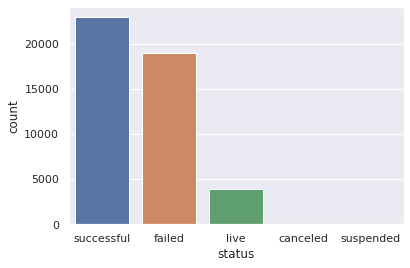

In [21]:
#Summary statistics for number of successful vs unsuccessful projects
sns.countplot(df["status"])
plt.show()

In [22]:
#Create masks based on project status for use in later analyses

not_live=df["status"]!="live"
failed=df["status"]=="failed"
successful=df["status"]=="successful"

#### Numerical features

In [23]:
#Check key statistical characteristics of numerical features
df[df["status"]=="failed"].describe()

project id          goal        pledged  funded percentage  \
count  1.896100e+04  1.896100e+04   18961.000000       18961.000000   
mean   1.079523e+09  1.636785e+04     897.256738           0.104855   
std    6.215744e+08  2.193439e+05    2842.363261           0.150177   
min    1.265810e+05  5.000000e-01       0.000000           0.000000   
25%    5.423241e+08  2.500000e+03      20.000000           0.002857   
50%    1.070972e+09  5.000000e+03     170.000000           0.037333   
75%    1.622762e+09  1.200000e+04     740.000000           0.148571   
max    2.147370e+09  2.147484e+07  112287.000000           1.079700   

            backers        levels       updates      comments      duration  \
count  18961.000000  18961.000000  18961.000000  18961.000000  18961.000000   
mean      12.569485      7.288276      1.496018      0.963346     42.975210   
std       27.152465      3.740560      3.237211      4.890249     18.700137   
min        0.000000      0.000000      0.000000      0.000000      1.000000   
25%        1.000000      5.000000      0.000000      0.000000     30.000000   
50%        4.000000      7.000000      0.000000      0.000000     36.000000   
75%       14.000000      9.000000      2.000000      1.000000     59.880000   
max      882.000000     70.000000     83.000000    442.000000     91.960000   

       funded month    funded dow   funded hour  success_fail  
count  18961.000000  18961.000000  18961.000000       18961.0  
mean       6.104425      3.115764     11.750382           0.0  
std        3.339408      2.012132      7.888268           0.0  
min        1.000000      0.000000      0.000000           0.0  
25%        3.000000      1.000000      4.000000           0.0  
50%        5.000000      3.000000     14.000000           0.0  
75%        9.000000      5.000000     19.000000           0.0  
max       12.000000      6.000000     23.000000           0.0

We see note that:
- the **mean pledged amount is 4,983.02**
- Several features, (e.g. goal, pledged, backers) show very wide spread, i.e. gaps between mean, q75 and max)

Next step is to build **histograms for the numerical features** to get a better understanding of their distribution

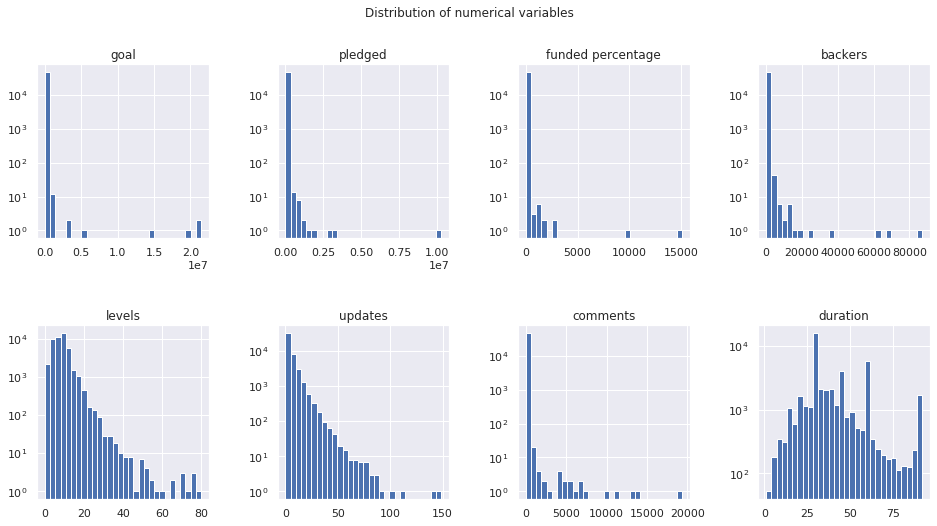

In [24]:
#Define list of numerical features
t=["goal","pledged","funded percentage","backers","levels","updates","comments","duration"]

#Define grid of subplots
fig, ax = plt.subplots(2,4, figsize=(16, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.suptitle("Distribution of numerical variables")

#Define individual subplots
for i in range(len(t)):
    plt.subplot(2,4,i+1)
    a=t[i]
    plt.hist(df[a],bins=30, log=True) #last argument enables to better visualise for features with large spread.
    plt.title(a)
    
plt.show()

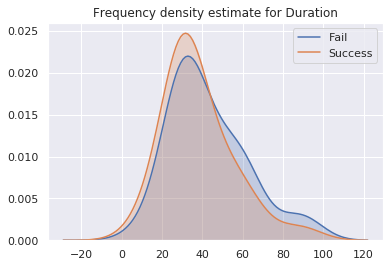

In [25]:
#Zoom into Duration with a kde plot

bw=10

sns.kdeplot(df["duration"][not_live][df["success_fail"]==0], shade=True, label='Fail', bw=bw)
sns.kdeplot(df["duration"][not_live][df["success_fail"]==1], shade=True, label='Success', bw=bw)
plt.title("Frequency density estimate for Duration")
    
plt.show()

We see **positive skew in all features**

Next we would like to investigate **correlation between numerical features and the pledged amount**.

We begin with scatter plots.

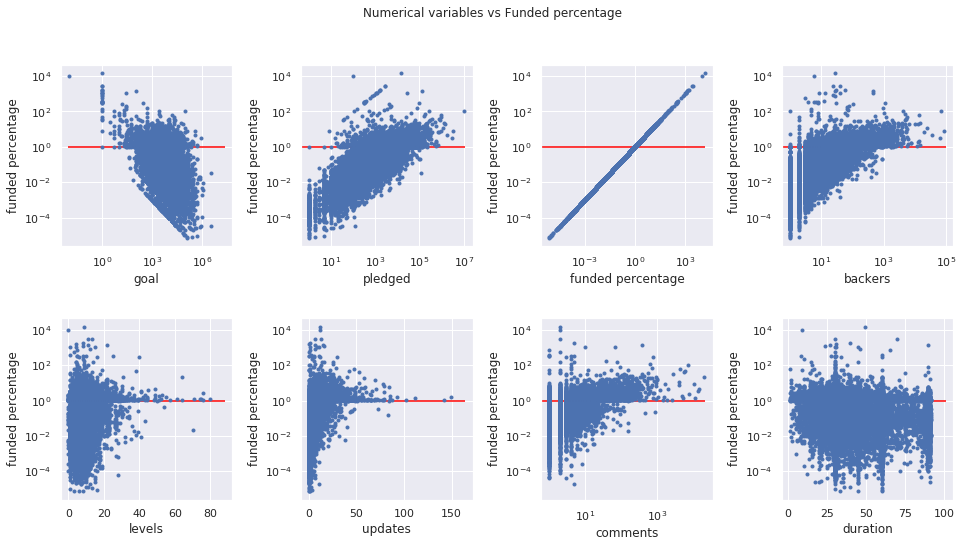

In [26]:
#Define grid of subplots
fig, ax = plt.subplots(2,4, figsize=(16, 8))
plt.suptitle("Numerical variables vs Funded percentage")
plt.subplots_adjust(hspace=0.4, wspace=0.4)


#Define individual subplots
for i in range(len(t)):
    plt.subplot(2,4,i+1)
    a=t[i]
    plt.plot(df[a][not_live], df["funded percentage"][not_live], ".")
    plt.yscale("log")
    if df[a].max()/np.percentile(df[a], 99)>10:
        plt.xscale("log")
    plt.hlines(y = 1, xmin = 0.9*df[a][not_live].min(), xmax = 1.1*df[a][not_live].max(), color = "red")
    plt.xlabel(a)
    plt.ylabel("funded percentage")

plt.show()

We see a significant correlation with backers and comments, and less strong correlation with goal, levels, updates and duration. 

To see the correlations more explicitly, we build a **heatmap of the correlation factors**.

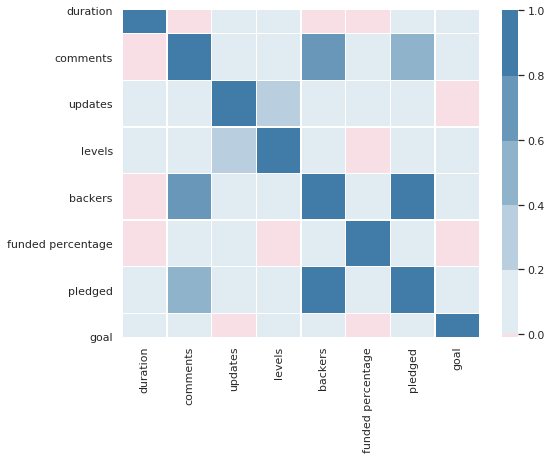

In [27]:
#Compute correlation factors
corrmat=df[t][not_live].corr()

#define colour map
c_map=sns.diverging_palette(1,240, n=10)

f,ax = plt.subplots(figsize=(8,6))

#define masked area of heatmap
#mask = np.zeros_like(corrmat) # returns numpy array identical in shape to corrmat, filled with zeros
#mask[np.triu_indices_from(mask)] = True # takes mask and changes the triangle above the diagonal to 1

#plot heatmap, applying the mask, reversing the order of rows and columns for display purposes
with sns.axes_style("white"):
    ax = sns.heatmap(corrmat[corrmat.columns[::-1]].iloc[::-1], center = 0, linewidths=.5,cmap=c_map)

#### Categorical features

We will examine how the following categorical features influence the pledged amount:

- Month, Day of week, Hour 
- Category & sub-category
- Location

To do this, we will use quantiles, specifically the median, to avoid undue influence of outliers

**Month, Day of week, Hour**

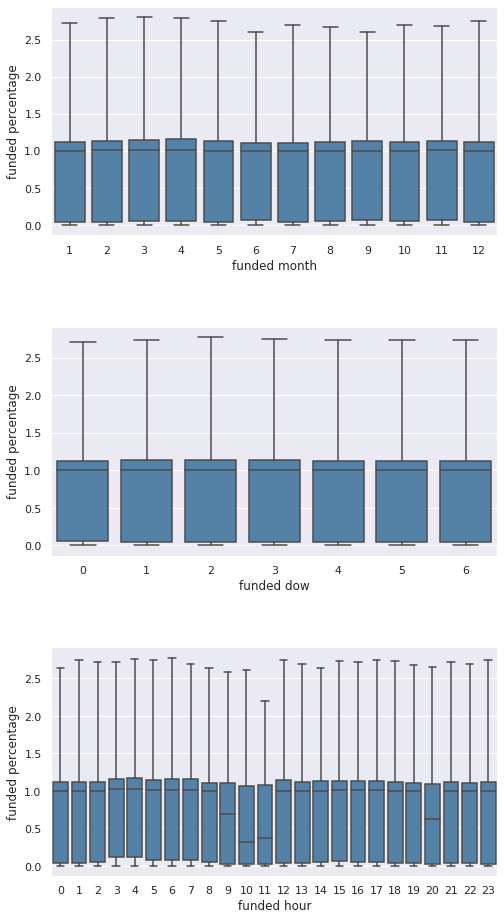

In [28]:
#Create boxplots

stamps=["funded month", "funded dow", "funded hour"]

fig, ax = plt.subplots(3,1, figsize=(8,16))
plt.subplots_adjust(hspace=0.4, wspace=0.2)

for i in range(3):
    plt.subplot(3,1,i+1)
    sns.boxplot(x=stamps[i], y="funded percentage", data=df[not_live], color="steelblue",showfliers = False)
    #plt.yscale("log")
plt.show()

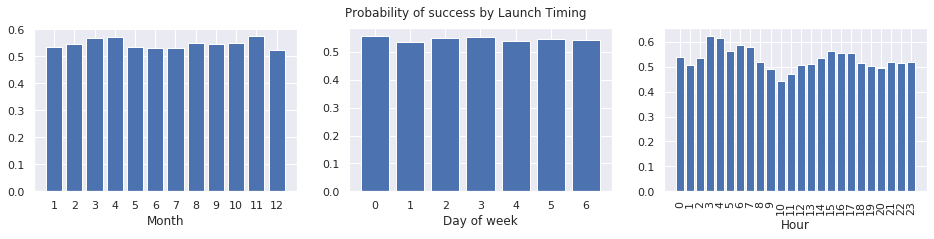

In [29]:
#Create plots of probability of success by launch timing (NOTE: only for non-live projects)

fig=plt.subplots(1,3, figsize=(16,3))
plt.suptitle("Probability of success by Launch Timing")

heights=[]
x=[]
for i in range(len(set(df["funded month"]))):
    x.append(str(list(set(df["funded month"]))[i]))
    heights.append(df["success_fail"][not_live][df["funded month"]==list(set(df["funded month"]))[i]].mean())
    month_success=pd.DataFrame({"Funded month": x, "Success probability": heights})

plt.subplot(1,3,1)
plt.bar(x=month_success["Funded month"], height=month_success["Success probability"])
#plt.xticks(rotation=90)
plt.xlabel("Month")


heights=[]
x=[]
for i in range(len(set(df["funded dow"]))):
    x.append(str(list(set(df["funded dow"]))[i]))
    heights.append(df["success_fail"][not_live][df["funded dow"]==list(set(df["funded dow"]))[i]].mean())
    dow_success=pd.DataFrame({"Funded dow": x, "Success probability": heights})

plt.subplot(1,3,2)
plt.bar(x=dow_success["Funded dow"], height=dow_success["Success probability"])
#plt.xticks(rotation=90)
plt.xlabel("Day of week")


heights=[]
x=[]
for i in range(len(set(df["funded hour"]))):
    x.append(str(list(set(df["funded hour"]))[i]))
    heights.append(df["success_fail"][not_live][df["funded hour"]==list(set(df["funded hour"]))[i]].mean())
    hour_success=pd.DataFrame({"Funded hour": x, "Success probability": heights})

plt.subplot(1,3,3)
plt.bar(x=hour_success["Funded hour"], height=hour_success["Success probability"])
plt.xticks(rotation=90)
plt.xlabel("Hour")

plt.show()


**Category & Subcategory**

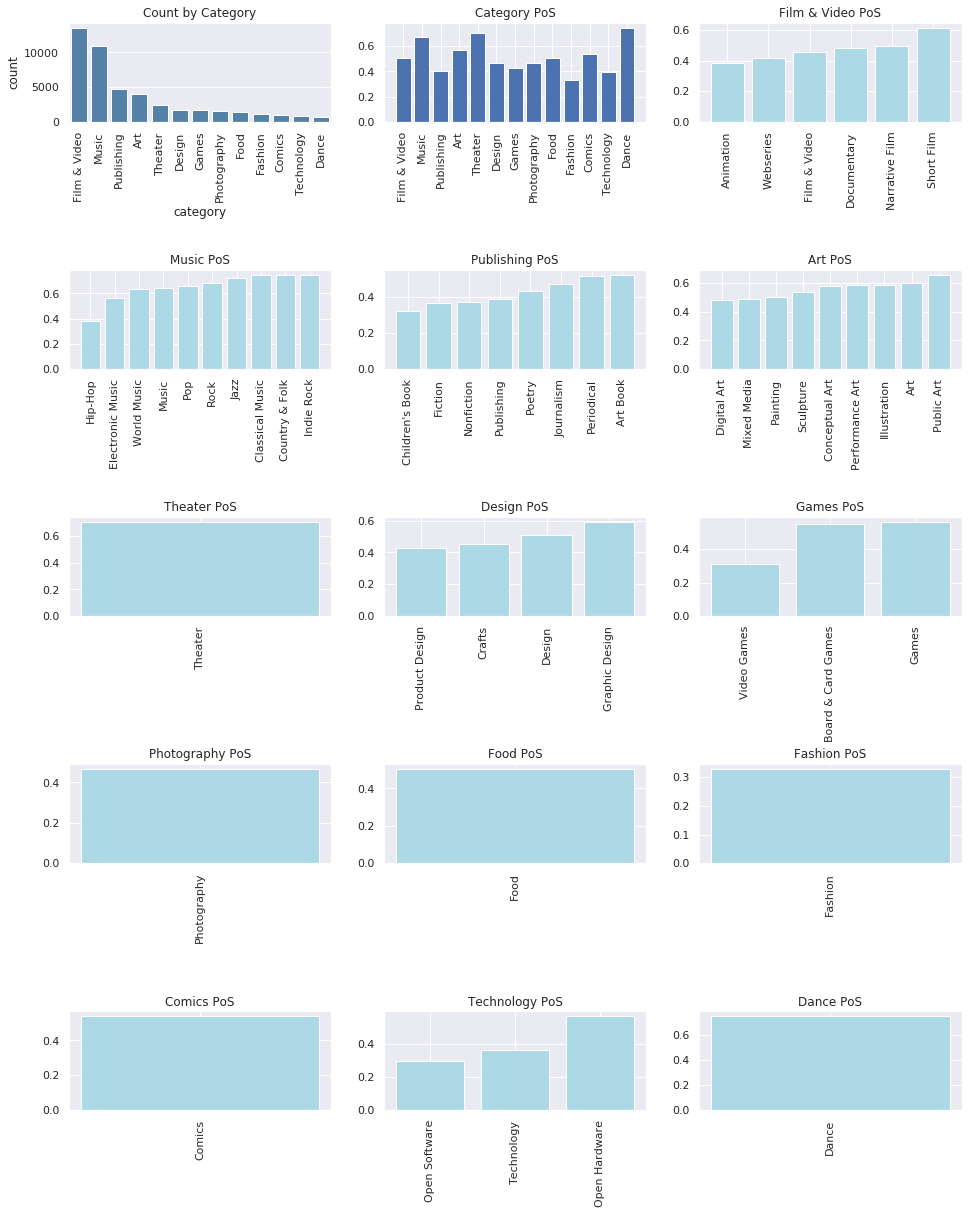

In [30]:
#Create plots of probability of success by Category (NOTE: only for non-live projects)

fig, ax = plt.subplots(5,3, figsize=(16,20))
plt.subplots_adjust(hspace=1.5, wspace=0.2)

order=list(df.groupby(df["category"]).count().sort_values(by="project id", ascending=False).index)

plt.subplot(5,3,1)
sns.countplot(df["category"], color="steelblue", order=order)
plt.title("Count by Category")
plt.xticks(rotation=90)

heights=[]
x=[]
for i in range(len(order)):
    x.append(order[i])
    heights.append(df["success_fail"][not_live][df["category"]==order[i]].mean())
    cat_means=pd.DataFrame({"Category": x, "Success likelihood": heights})
plt.subplot(5,3,2)
plt.bar(x=cat_means["Category"], height=cat_means["Success likelihood"])
plt.xticks(rotation=90)
plt.title("Category PoS")


for c in order:
    x_s=[]
    heights_s=[]
    plt.subplot(5,3,order.index(c)+3)
    plt.xticks(rotation=90)
    plt.title(c+ " PoS")
    for s in range(len(set(df["subcategory"][df["category"]==c]))):
        x_s.append(list(set(df["subcategory"][df["category"]==c]))[s])
        heights_s.append(df["success_fail"][not_live][df["subcategory"]==list(set(df["subcategory"][df["category"]==c]))[s]].mean())
        zoom_means=pd.DataFrame({"Subcategory": x_s, "Success likelihood": heights_s}).sort_values(by="Success likelihood")
    plt.bar(x=zoom_means["Subcategory"], height=zoom_means["Success likelihood"], color="lightblue")

plt.show()

**Location**

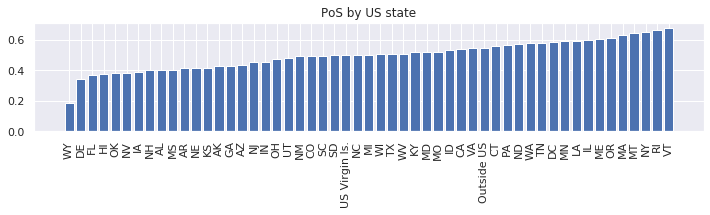

In [31]:
#Create plots of probability of success by Location (NOTE: only for non-live projects)

heights=[]
x=[]

fig=plt.subplots(1, figsize=(12,2))

for i in range(len(set(df["loc category"]))):
    x.append(list(set(df["loc category"]))[i])
    heights.append(df["success_fail"][not_live][df["loc category"]==list(set(df["loc category"]))[i]].mean())
    loccat_success=pd.DataFrame({"Loc category": x, "Success likelihood": heights}).sort_values(by="Success likelihood")

plt.bar(x=loccat_success["Loc category"], height=loccat_success["Success likelihood"])
plt.xticks(rotation=90)
plt.title("PoS by US state")
plt.show()

**Visualising location medians on a map**

In [32]:
import folium
import geojson as gs
import geopandas as gp

In [33]:
# create a plain US map
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
us_map

In [34]:
#Import geoJSON data for the state geometries (I have used free US census data)
url_us="https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json"
us_states=gp.read_file(url_us)
us_states.head()

GEO_ID STATE           NAME LSAD  CENSUSAREA  \
0  0400000US23    23          Maine        30842.923   
1  0400000US25    25  Massachusetts         7800.058   
2  0400000US26    26       Michigan        56538.901   
3  0400000US30    30        Montana       145545.801   
4  0400000US32    32         Nevada       109781.180   

                                            geometry  
0  (POLYGON ((-67.619761 44.519754, -67.61541 44....  
1  (POLYGON ((-70.832044 41.606504, -70.823735 41...  
2  (POLYGON ((-88.684434 48.115785, -88.675628 48...  
3  POLYGON ((-104.057698 44.997431, -104.250145 4...  
4  POLYGON ((-114.0506 37.000396, -114.049995 36....

Ful state names are used in the geoJSON file, whereas the Kickstarter data shows abbreviations only.

We will create a quick lookup so that the abbreviations can be added to the geoJSON data

In [35]:
#Create lookup table for US state abbreviations
lookup_states=pd.DataFrame({
    "NAME": ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming','District of Columbia'], 
                            "Abbreviation": ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY','DC']
})
lookup_states.head()

NAME Abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

In [36]:
#Merge the state abbreviations into the geoJSON file
us_states=pd.merge(us_states, lookup_states, on="NAME")
us_states.head()

GEO_ID STATE           NAME LSAD  CENSUSAREA  \
0  0400000US23    23          Maine        30842.923   
1  0400000US25    25  Massachusetts         7800.058   
2  0400000US26    26       Michigan        56538.901   
3  0400000US30    30        Montana       145545.801   
4  0400000US32    32         Nevada       109781.180   

                                            geometry Abbreviation  
0  (POLYGON ((-67.619761 44.519754, -67.61541 44....           ME  
1  (POLYGON ((-70.832044 41.606504, -70.823735 41...           MA  
2  (POLYGON ((-88.684434 48.115785, -88.675628 48...           MI  
3  POLYGON ((-104.057698 44.997431, -104.250145 4...           MT  
4  POLYGON ((-114.0506 37.000396, -114.049995 36....           NV

Finally, we recall that the medians data contains two "categories" - "US Virgin Is." and "Outside US" that we will not be using. 

We define a new dataframe with just the data on US states.

In [37]:
#First get rid of US Virgin islands and Outside US
non_US=[int(loccat_success[loccat_success["Loc category"]=="US Virgin Is."].index.values), 
        int(loccat_success[loccat_success["Loc category"]=="Outside US"].index.values)]

loccat_map=loccat_success.drop(non_US) #indices for "US Virgin Is." and "Outside US"

In [38]:
# generate choropleth map 
us_map.choropleth(
    geo_data=us_states,
    data=loccat_map,
    columns=['Loc category', 'Success likelihood'],
    key_on='feature.properties.Abbreviation',
    fill_color='YlGn', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Average PoS by state'
)

# Save map as html file
us_map.save("USchloro.html")